In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pywt
from scipy.fftpack import fft
import joblib
import librosa
import glob
from tqdm.notebook import tqdm

# Tests and scalogram image presentation

In [5]:
scale_file = "../raw data/all_actors/03-01-01-01-01-01-01.wav"
scales = np.arange(1, 128)
signal, sr = librosa.load(scale_file)

In [6]:
waveletname = 'cmor'
scales = np.arange(1,128)
coef, freq = pywt.cwt(signal, scales, waveletname);

/opt/conda/lib/python3.7/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


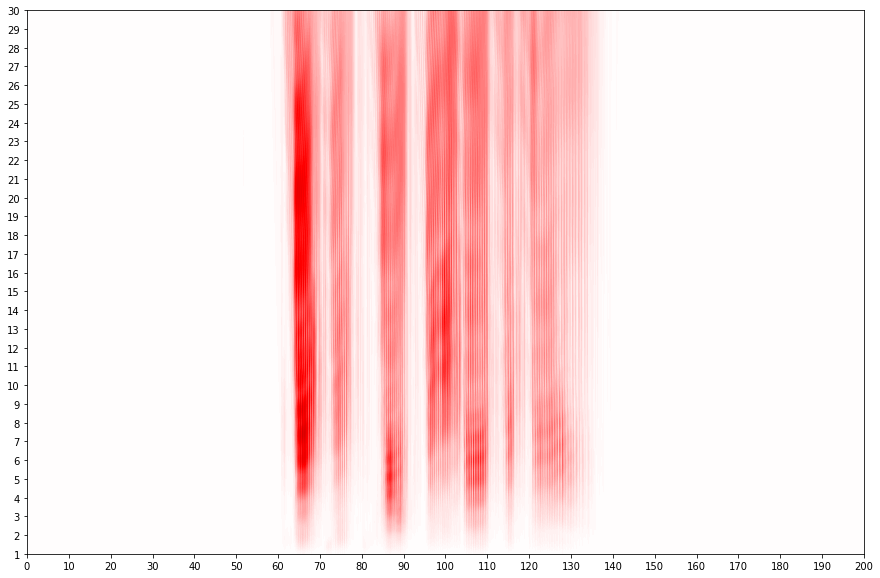

In [22]:
plt.figure(figsize=(15, 10));
cmap = plt.cm.seismic
plt.imshow(abs(coef), extent=[0, 200, 30,1], interpolation = 'bilinear', cmap=cmap, aspect='auto', vmax =abs(coef).max(), vmin=-abs(coef).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,31,1))
plt.xticks(np.arange(0,201,10))
plt.show()

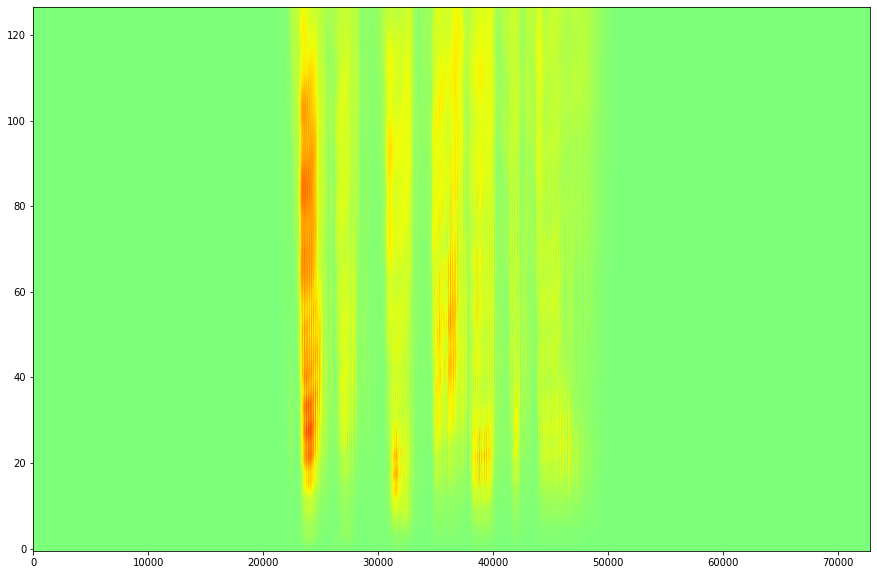

In [23]:
plt.figure(figsize=(15, 10));
plt.imshow(abs(coef), interpolation = 'bilinear', cmap='jet', aspect='auto', vmax =abs(coef).max(), vmin=-abs(coef).max())
plt.gca().invert_yaxis()
plt.show()

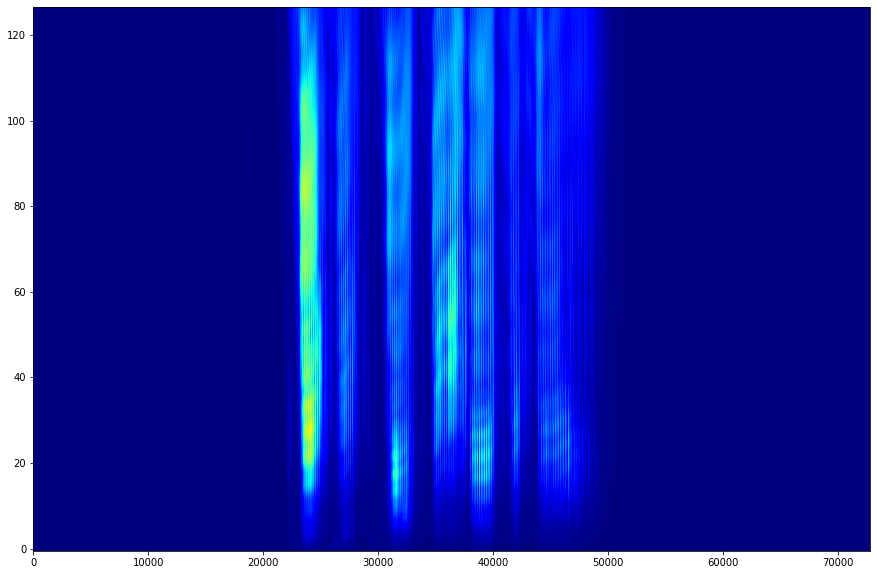

In [26]:
plt.figure(figsize=(15, 10));
plt.imshow(abs(coef), interpolation = 'bilinear', cmap='jet', aspect='auto')

plt.gca().invert_yaxis()
plt.show()

# Extraction Methods 

In [ ]:
def get_scalogram(coef, show=Flase):
    plt.figure(figsize=(15, 10));
    plt.imshow(abs(coef), interpolation = 'bilinear', cmap='jet', aspect='auto')
    plt.gca().invert_yaxis()
    
    if show:
        plt.show()
    return 

In [3]:
def extract(audio_file):
    name=os.path.basename(audio_file)
    name=os.path.splitext(name)[0]
    label = int(name[7:8]) - 1
    
    return label, audio_file

def get_cwt_feats(dir_name):
    #init
    freqs, coefs, y = [], [], []
    scales = np.arange(1, 128)
    waveletname = 'morl'

    dir_name = glob.glob(dir_name + "/*.wav")
    
    
    #progression bar 
    file_count = len(dir_name)
    bar = tqdm(desc="proccessing files", total=file_count)
    tot = 0

    for file in dir_name:
        #update bar
        bar.update(1)
        tot += 1

        #get signal
        label, audio_file = extract(file)
        signal, sr = librosa.load(audio_file)
        
        #get cwt coef
        coef, freq = pywt.cwt(signal, scales, waveletname)

        freqs.append(freq)
        coefs.append(coef)
        y.append(label)
        
        
    
    return freqs, coefs, y

In [ ]:
dir_path = "../raw data/toronto_ds/conc_data"
get_cwt_feats(dir_path)

In [ ]:
joblib.dump(coefs,"../feats/cwt/coefs.joblib")
joblib.dump(freqs,"../feats/cwt/freqs.joblib")
joblib.dump(y,"../feats/cwt/y.joblib")

In [14]:
freqs, coefs, y = [], [], []
freqs.append(freq)
coefs.append(coef)

In [15]:
joblib.dump(np.asarray(coefs) ,"../feats/cwt/coefs_np.joblib")
joblib.dump(np.asarray(freqs),"../feats/cwt/freqs_np.joblib")
joblib.dump(np.asarray(y),"../feats/cwt/y_np.joblib")

['../feats/cwt/y_np.joblib']

# =====================

In [4]:
from tqdm.contrib.concurrent import process_map

def process(filename):
    name=os.path.basename(filename)
    name=os.path.splitext(name)[0]
    label = int(name[7:8]) - 1
    signal, sr = librosa.load(filename)
    coef, freq = pywt.cwt(signal, np.arange(1, 128), 'morl')
    np.savez_compressed(filename+'.npz', coef, freq, label)


a=process_map(process, glob.glob("/workspace/data/conc_data/*.wav"), max_workers=8, smoothing=0.0, chunksize=4)

  0%|          | 0/5252 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Process ForkProcess-5:
Process ForkProcess-1:
Process ForkProcess-4:
Process ForkProcess-2:
Process ForkProcess-6:
Process ForkProcess-7:
Process ForkProcess-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tqdm/contrib/concurrent.py", line 76, in _executor_map
    return list(tqdm_class(ex.map(fn, *iterables, **map_args), **kwargs))
  File "/opt/conda/lib/python3.7/site-packages/tqdm/notebook.py", line 254, in __iter__
    for obj in super(tqdm_notebook, self).__iter__():
  File "/opt/conda/lib/python3.7/site-packages/tqdm/std.py", line 1178, in __iter__
    for obj in iterable:
  File "/opt/conda/lib/python3.7/concurrent/futures/process.py", line 483, in _chain_from_iterable_of_lists
    for element in iterable:
  File "/opt/conda/lib/python3.7/concurrent/futures/_base.py", line 598, in result_iterator
    yield fs.pop().result()
  File "/opt/conda/lib/python3.7/concurrent/futures/_base.py", line 430, in result
    self._condition.wait(timeout)
  File "/opt/conda/lib/python3.7/threading.py", line 296, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception 

TypeError: can only concatenate str (not "list") to str

In [7]:
from tqdm.contrib.concurrent import process_map
import cv2
def process2(filename):
    name=os.path.basename(filename)
    name=os.path.splitext(name)[0]
    label = int(name[7:8]) - 1
    signal, sr = librosa.load(filename)
    coef, freq = pywt.cwt(signal, np.arange(1, 128), 'morl')
    coef = abs(coef).astype(np.float64) / np.amax(coef)
    coef *= 255.0
    img = coef.astype(np.uint8)
    img = np.flipud(img)
    res = cv2.resize(img, dsize=(600, 127), interpolation=cv2.INTER_NEAREST)
    
    #save
    filename = filename.replace("conc_data", "scalogram") # -> change dir
    filename = filename.replace(".wav.npz", "") 
    np.savez_compressed(filename+"_scalogram"+'.npz', res, label)
   
a=process_map(process2, glob.glob("/workspace/data/conc_data/*.wav"), max_workers=12, smoothing=0.0, chunksize=4)

  0%|          | 0/5252 [00:00<?, ?it/s]

In [8]:
data = np.load('/workspace/data/conc_data/38-81-05-25-19-68-20.wav.npz', allow_pickle=True)
coef, freq, label = data['arr_0'], data['arr_1'], data['arr_2']

In [14]:
len(glob.glob("/workspace/data/conc_data/*.wav"))

5252

In [18]:
len(glob.glob('/workspace/data/conc_data/*.npz'))

5252

# -------------------------------------------------------------------------------------------------------  


# extract spectogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pywt
from scipy.fftpack import fft
import joblib
import librosa
import glob
from tqdm.notebook import tqdm
from tqdm.contrib.concurrent import process_map
import gc

In [2]:
''' 
Creates scalogram from cwt coefficients 
in: coefficients          : numpy array
out: three chanell image  : numpy array 
'''
def get_scalogram(coef, show = False):
#     plt.close('all');
    # create scalogram figure
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax1.imshow(abs(coef), interpolation = 'bilinear', cmap='jet', aspect='auto');
    plt.gca().invert_yaxis();
    fig.tight_layout(pad=False)
    plt.axis('off');

    # convert scalogram to np array
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    if show:
        fig.show()
    
    plt.close('all');
    del fig
    gc.collect()
    
    
    return data

In [3]:
''' 
Walks through files list and generates scalograms  
in:  file paths list            : (coef, freq, label).npz 
out: saves new compressed file  : (coef, freq, image, label).npz 
'''
def generate_feats(filename):
    #extract coefs from file and get scalogram
    data = np.load(filename, allow_pickle=True)
    coef, freq, label = data['arr_0'], data['arr_1'], data['arr_2']
    image = get_scalogram(coef)
    
    #save
    filename = filename.replace("conc_data", "scalogram") # -> change dir
    filename = filename.replace(".wav.npz", "") 
    np.savez_compressed(filename+"_scalogram"+'.npz', image, label)
    del image
    del data, coef, freq, label
    gc.collect()
    

In [ ]:
''' 
Walks through files list and generates scalograms  
in:  file paths list            : (coef, freq, label).npz 
out: saves new compressed file  : (coef, freq, image, label).npz 
'''
def generate_feats2(filename):
    #extract coefs from file and get scalogram
    data = np.load(filename, allow_pickle=True)
    coef, freq, label = data['arr_0'], data['arr_1'], data['arr_2']
    
    coef = abs(coef).astype(np.float64) / np.amax(coef)
    coef *= 255.0
    img = coef.astype(np.uint8)
    img = np.flipud(img)
    res = cv2.resize(img, dsize=(600, 127), interpolation=cv2.INTER_NEAREST)
    
    #save
    filename = filename.replace("conc_data", "scalogram") # -> change dir
    filename = filename.replace(".wav.npz", "") 
    np.savez_compressed(filename+"_scalogram"+'.npz', res, label)

    

### multi

In [ ]:
a=process_map(generate_feats, glob.glob("/workspace/data/conc_data/*.npz"), max_workers=8, smoothing=0.0, chunksize=4)

  0%|          | 0/5252 [00:00<?, ?it/s]

### sequential

In [5]:
files = glob.glob("/workspace/data/conc_data/*.npz")
for file in files:
    generate_feats(file)

KeyboardInterrupt: 

# TEST

3


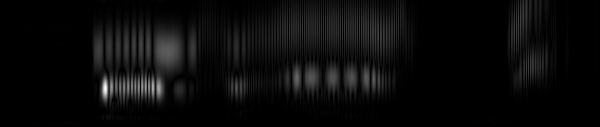

In [29]:
from PIL import Image

#generate_feats(glob.glob("/workspace/data/conc_data/*.npz")[0])
data = np.load('/workspace/data/scalogram/35-18-04-59-10-22-84.wav_scalogram.npz', allow_pickle=True)
image, label = data['arr_0'], data['arr_1']
img = Image.fromarray(image)
print(label)
img

In [30]:

lists = glob.glob("/workspace/data/scalogram/*.npz")
len(lists)

5252

In [31]:
lists

['/workspace/data/scalogram/51-24-01-48-33-69-20.wav_scalogram.npz',
 '/workspace/data/scalogram/03-01-07-02-01-02-08.wav_scalogram.npz',
 '/workspace/data/scalogram/11-47-03-85-37-79-84.wav_scalogram.npz',
 '/workspace/data/scalogram/03-01-06-02-02-01-18.wav_scalogram.npz',
 '/workspace/data/scalogram/12-67-05-68-87-53-47.wav_scalogram.npz',
 '/workspace/data/scalogram/72-78-04-62-31-11-98.wav_scalogram.npz',
 '/workspace/data/scalogram/57-90-04-52-46-63-37.wav_scalogram.npz',
 '/workspace/data/scalogram/73-58-05-94-74-86-38.wav_scalogram.npz',
 '/workspace/data/scalogram/87-67-05-44-48-96-82.wav_scalogram.npz',
 '/workspace/data/scalogram/03-01-04-01-01-02-20.wav_scalogram.npz',
 '/workspace/data/scalogram/32-78-05-82-36-73-79.wav_scalogram.npz',
 '/workspace/data/scalogram/19-58-04-49-86-93-38.wav_scalogram.npz',
 '/workspace/data/scalogram/03-01-05-02-02-02-01.wav_scalogram.npz',
 '/workspace/data/scalogram/03-01-01-01-01-02-15.wav_scalogram.npz',
 '/workspace/data/scalogram/03-02-

In [7]:
import numpy as np
data = np.load('/workspace/data/conc_data/17-24-05-19-37-80-84.wav.npz', allow_pickle=True)

In [11]:
data[""]


In [12]:
coef, freq, label = data['arr_0'], data['arr_1'], data['arr_2']

error: Error -3 while decompressing data: invalid block type

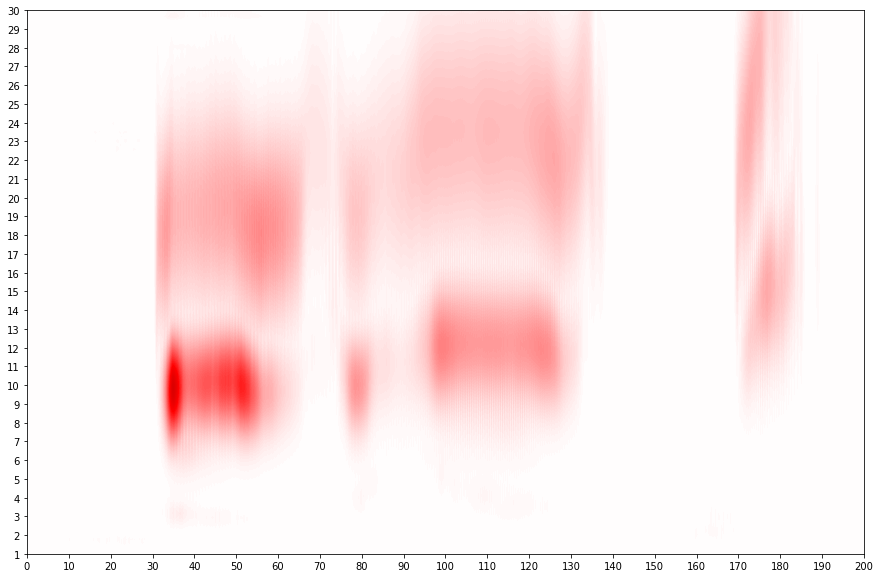

In [41]:
plt.figure(figsize=(15, 10));
cmap = plt.cm.seismic
plt.imshow(abs(coef), extent=[0, 200, 30,1], interpolation = 'bilinear', cmap=cmap, aspect='auto', vmax =abs(coef).max(), vmin=-abs(coef).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,31,1))
plt.xticks(np.arange(0,201,10))
plt.show()